In [21]:
# import sqlalchemy
import sqlite3
import pandas as pd

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Connect to SQLite database
connection = sqlite3.connect(r'../data/vivino.db')
# Create a cursor object
cursor = connection.cursor()

## Most common grapes, best rated winse

We would like to select wines that are easy to find all over the world. 

Find the top 3 most common grape all over the world and for each grape, give us the 5 best rated wines.

In [24]:
query_grapes = """
    SELECT grapes.name, 
           COUNT(most_used_grapes_per_country.country_code) AS total
           -- SUM(most_used_grapes_per_country.wines_count) AS total_wines
           -- AVG(most_used_grapes_per_country.wines_count) AS total_wines
    FROM grapes
        JOIN most_used_grapes_per_country ON grapes.id = most_used_grapes_per_country.grape_id
    GROUP BY most_used_grapes_per_country.grape_id
    ORDER BY total DESC
    -- LIMIT 3
    ;
"""

df_grapes = pd.read_sql_query(query_grapes, connection)
print(df_grapes.shape)
display(df_grapes)
df_grapes.to_csv("../data/csv/question_4_0.csv")

(21, 2)


,name,total
0,Cabernet Sauvignon,12
1,Merlot,11
2,Chardonnay,6
3,Pinot Noir,3
4,Shiraz/Syrah,3
5,Plavac Mali,1
6,Furmint,1
7,Weissburgunder,1
8,Feteasca Neagra,1
9,Spätburgunder,1


In [25]:
df_grapes_top_3 = df_grapes.iloc[0:3,:]

new_row = {'name': ['Others'], 'total': [sum(df_grapes.iloc[3:,1])]}
df_grapes_others = pd.DataFrame(new_row)
df_grapes_top_3_rest = pd.concat([df_grapes_top_3, df_grapes_others])

display(df_grapes_top_3_rest.reset_index(drop=True))
df_grapes_top_3_rest.to_csv("../data/csv/question_4_1.csv")

,name,total
0,Cabernet Sauvignon,12
1,Merlot,11
2,Chardonnay,6
3,Others,22


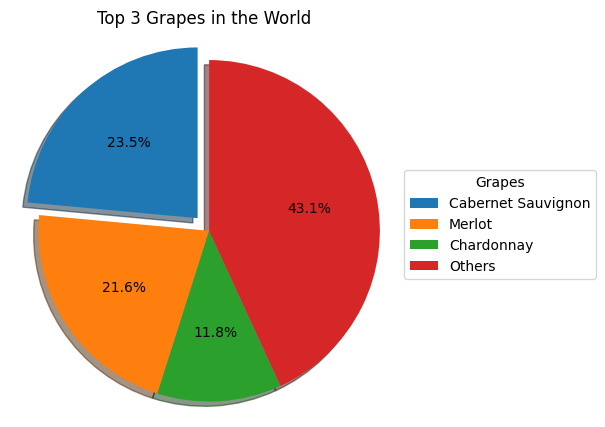

In [26]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(
    df_grapes_top_3_rest["total"], 
    labels=df_grapes_top_3_rest["name"],
    labeldistance = None,
    explode = (0.1, 0, 0, 0),
    autopct='%1.1f%%',
    shadow=True,
    startangle=90
)
ax1.set_title('Top 3 Grapes in the World', loc='center')
ax1.legend(
    df_grapes_top_3_rest["name"],
    title="Grapes",
    loc="center left",
    bbox_to_anchor = (1, 0.5)
)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [27]:
# No connection between grapes and wines tables...